<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [2]:
import pandas as pd
import psycopg2

In [3]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [4]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [5]:
# для удобства будем проставлять нумерацию в названии переменных, для соотнесения к какому заданию относится запрос
query_3_1 = f'''
    SELECT count(*)
    from vacancies v
'''

In [6]:
# для удобства будем брать данные из полученного DF с подписью
display(f'Вакансий в базе: {int(pd.read_sql_query(query_3_1, connection).iloc[0])}')

C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\2107243627.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  display(f'Вакансий в базе: {int(pd.read_sql_query(query_3_1, connection).iloc[0])}')
C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\2107243627.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  display(f'Вакансий в базе: {int(pd.read_sql_query(query_3_1, connection).iloc[0])}')


'Вакансий в базе: 49197'

2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [7]:
# общие данные можно получить по размеру таблицы (количеству записей в ней)
query_3_2 = f'''
    SELECT count(*)
    from EMPLOYERS
'''

In [8]:
display(f'Работодателей в базе: {int(pd.read_sql_query(query_3_2, connection).iloc[0])}')

C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\1974922605.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  display(f'Работодателей в базе: {int(pd.read_sql_query(query_3_2, connection).iloc[0])}')
C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\1974922605.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  display(f'Работодателей в базе: {int(pd.read_sql_query(query_3_2, connection).iloc[0])}')


'Работодателей в базе: 23501'

3. Посчитате с помощью запроса количество регионов (таблица areas).

In [9]:
# общие данные можно получить по размеру таблицы (количеству записей в ней)
query_3_3 = f'''
    SELECT count(*)
    from AREAS
'''

In [10]:
display(f'Регионов в базе: {int(pd.read_sql_query(query_3_3, connection).iloc[0])}')

C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\4241744559.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  display(f'Регионов в базе: {int(pd.read_sql_query(query_3_3, connection).iloc[0])}')
C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\4241744559.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  display(f'Регионов в базе: {int(pd.read_sql_query(query_3_3, connection).iloc[0])}')


'Регионов в базе: 1362'

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [11]:
#общие данные можно получить по размеру таблицы (количеству записей в ней)
query_3_4 = f'''
    SELECT count(*)
    from INDUSTRIES
'''

In [12]:
display(f'Сфер деятельности в базе: {int(pd.read_sql_query(query_3_4, connection).iloc[0])}')

C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\717182474.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  display(f'Сфер деятельности в базе: {int(pd.read_sql_query(query_3_4, connection).iloc[0])}')
C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\717182474.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  display(f'Сфер деятельности в базе: {int(pd.read_sql_query(query_3_4, connection).iloc[0])}')


'Сфер деятельности в базе: 294'

***

Вывод:
Удалось подключиться к БД, удалось узнать размерность записей:

Вакансий в базе: 49197
Работодателей в базе: 23501
Регионов в базе: 1362
Сфер деятельности в базе: 294

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [13]:
# установил LIMIT т.к. для ответа в тестировании необходимо только ТОП-5 регионов
query_4_1 = f'''
    SELECT 
    a.name, 
    count(v.id)
    from areas a
    join vacancies v on a.id = v.area_id
    group by a.id
    order by 2 desc
    limit 5
'''

In [14]:
aw_4_1 = pd.read_sql_query(query_4_1, connection)
display(f'Вакансий в ТОП-5 регионов:')
aw_4_1

C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\180584654.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  aw_4_1 = pd.read_sql_query(query_4_1, connection)


'Вакансий в ТОП-5 регионов:'

,name,count
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [15]:
# ввводим уловия: отсуствие пустого значения
query_4_2 = f'''
    SELECT 
   count(*)
    FROM VACANCIES v
    WHERE salary_from IS NOT NULL or salary_to IS NOT NULL
    
'''

In [16]:
display(f'Количество вакансий, где заполнено хотя бы одно из двух полей с зарплатой: {int(pd.read_sql_query(query_4_2, connection).iloc[0])}')

C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\792036167.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  display(f'Количество вакансий, где заполнено хотя бы одно из двух полей с зарплатой: {int(pd.read_sql_query(query_4_2, connection).iloc[0])}')
C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\792036167.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  display(f'Количество вакансий, где заполнено хотя бы одно из двух полей с зарплатой: {int(pd.read_sql_query(query_4_2, connection).iloc[0])}')


'Количество вакансий, где заполнено хотя бы одно из двух полей с зарплатой: 24073'

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [17]:
# выводим среднее значение по интересуемым столбцам
query_4_3 = f'''
    SELECT 
   round(AVG(salary_from)) AVG_from, 
   round(AVG(salary_to)) AVF_To
    FROM VACANCIES
    '''

In [18]:
aw_4_3 = pd.read_sql_query(query_4_3, connection)
display('Cредние значения для нижней и верхней границы зарплатной вилки')
aw_4_3


C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\595239690.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  aw_4_3 = pd.read_sql_query(query_4_3, connection)


'Cредние значения для нижней и верхней границы зарплатной вилки'

,avg_from,avf_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [19]:
# установил связку OFFSET и LIMIT для получения второго значения (вопрос теста), если нужен полный спиок - связку следует убрать
query_4_4 = f'''
    SELECT 
        schedule,
        employment, 
        count(*)
    FROM VACANCIES v
    GROUP BY 1, 2 
    ORDER BY 3 DESC
    OFFSET 1
    LIMIT 1
'''

In [20]:
aw_4_4 = pd.read_sql_query(query_4_4, connection)
display('Вторя пара по количеству ваканчий по графику и типу:')
aw_4_4.iloc[0]

C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\3934905636.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  aw_4_4 = pd.read_sql_query(query_4_4, connection)


'Вторя пара по количеству ваканчий по графику и типу:'

schedule      Удаленная работа
employment    Полная занятость
count                     7802
Name: 0, dtype: object

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [21]:
# считаем общее количество записей с группировкой по опыту
query_4_5 = f'''
    SELECT 
        experience,
        count(*)
    FROM VACANCIES 
    GROUP BY 1
    ORDER BY 2 ASC
    '''

In [22]:
aw_4_5 = pd.read_sql_query(query_4_5, connection)
display('Требуемый опыт работы в порядке убывания количества вакансий')
display(aw_4_5)

C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\199401535.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  aw_4_5 = pd.read_sql_query(query_4_5, connection)


'Требуемый опыт работы в порядке убывания количества вакансий'

,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

# Вывод:
- в ходе расчетов выяснилось, что самое большое количество вакансий в самых больших городах; 
- нашли средние значения верхней границы зарплатных вилок, которое составляет 110537.0;
- удалось выяснить, что самая востребованный вид работы - это удаленный при полной занятости, а также требования к стажу самые высокие - минимум 1 год;
- также есть вакансии для людей без опыта.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [23]:
#  для получения опыта подтянем через inner наименования работодателей, ограничим через LIMIT интересующий диапазон (для теста 1 и 5 место)
query_5_1 = f'''
    SELECT 
        e.name,
        count(v.id)
    FROM VACANCIES v
    JOIN EMPLOYERS e ON v.employer_id = e.id
    GROUP BY 1
    ORDER BY 2 DESC
    LIMIT 5
'''

In [24]:
aw = pd.read_sql_query(query_5_1, connection)
display(f'Первое место: {aw.iloc[0][0]}')
display(f'Пятое место: {aw.iloc[4][0]}')

C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\2144990142.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  aw = pd.read_sql_query(query_5_1, connection)
C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\2144990142.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(f'Первое место: {aw.iloc[0][0]}')


'Первое место: Яндекс'

C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\2144990142.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(f'Пятое место: {aw.iloc[4][0]}')


'Пятое место: Газпром нефть'

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [25]:
# также ограничен вывод через LIMIT т.к. интересует 1я строка
query_5_2 = f'''
    SELECT 
	    a.name,
	    count(distinct v.id) vac,
	    count(distinct e.id) emp
    FROM AREAS a
    LEFT JOIN VACANCIES v ON v.area_id = a.id
    LEFT JOIN EMPLOYERS e ON e.area = a.id 
	WHERE v.id is NULL
	GROUP BY 1
	ORDER BY emp DESC
	LIMIT 1
 '''

In [26]:
aw = pd.read_sql_query(query_5_2, connection)
display(f'Регион в котором больше всего работодателей, но нет вакансий: {aw.iloc[0][0]}')

C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\2892235849.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  aw = pd.read_sql_query(query_5_2, connection)
C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\2892235849.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(f'Регион в котором больше всего работодателей, но нет вакансий: {aw.iloc[0][0]}')


'Регион в котором больше всего работодателей, но нет вакансий: Россия'

3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [27]:
# также ограничен вывод через LIMIT т.к. интересует 1я строка
query_5_3 = f'''
    SELECT 
	employer_id,
	count(distinct area_id) 
    FROM VACANCIES v
	GROUP BY 1
	ORDER BY 2 DESC
	LIMIT 1 
'''

In [28]:
aw = pd.read_sql_query(query_5_3, connection)
display(f'Максимальное количество регионов одного работодателя: {aw.iloc[0][1]}')

C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\1886882383.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  aw = pd.read_sql_query(query_5_3, connection)
C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\1886882383.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(f'Максимальное количество регионов одного работодателя: {aw.iloc[0][1]}')


'Максимальное количество регионов одного работодателя: 181'

4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [29]:
# для этого используем LEFT JOIN, он оставит проспуски в строках без совпадений, они будут маркером подсчета
query_5_4 = f'''
    SELECT 
        count(*)
    FROM EMPLOYERS e
    LEFT JOIN EMPLOYERS_INDUSTRIES ei on e.id = ei.employer_id
    WHERE ei.industry_id is NULL
'''

In [30]:
aw = pd.read_sql_query(query_5_4, connection)
display(f'Количество работадателей, у которых не указана сфера деятельности. : {int(aw.iloc[0])}')

C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\3610855222.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  aw = pd.read_sql_query(query_5_4, connection)
C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\3610855222.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  display(f'Количество работадателей, у которых не указана сфера деятельности. : {int(aw.iloc[0])}')


'Количество работадателей, у которых не указана сфера деятельности. : 8419'

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [31]:
# выводить будет только name т.к. для ответа нужно именно наименование без данных, все расчеты сделаем внутри запроса и ограничим вывод OFFSET - LIMIT. Если нужен будет полный список ограничение мождно убрать
query_5_5 = f'''
    SELECT 
		e.name
    FROM EMPLOYERS e
    LEFT JOIN EMPLOYERS_INDUSTRIES ei on e.id = ei.employer_id
	GROUP BY e.id
    HAVING count(ei.industry_id) = 4
	ORDER BY e.name
	OFFSET 2 
	LIMIT 1
'''

In [32]:
aw = pd.read_sql_query(query_5_5, connection)
display('Наименование компании : {}'.format(aw.iloc[0]['name']))

C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\3405594451.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  aw = pd.read_sql_query(query_5_5, connection)


'Наименование компании : 2ГИС'

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [33]:
# подтягивать наименование работодателей через JOIN не стал, т.к. нужно только количество, для этого достаточно двух таблиц INDUSTRIES и EMPLOYERS_INDUSTRIES
query_5_6 = f'''
SELECT 
   	count(ei.employer_id) cnt
FROM EMPLOYERS_INDUSTRIES ei
JOIN INDUSTRIES i on i.id = ei.industry_id
WHERE i.name = 'Разработка программного обеспечения'

'''

In [34]:
aw = pd.read_sql_query(query_5_6, connection)
display('Количество работодателей в качестве сферы деятельности указана «Разработка программного обеспечения».: {}'.format(int(aw.iloc[0])))

C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\2367527268.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  aw = pd.read_sql_query(query_5_6, connection)
C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\2367527268.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  display('Количество работодателей в качестве сферы деятельности указана «Разработка программного обеспечения».: {}'.format(int(aw.iloc[0])))


'Количество работодателей в качестве сферы деятельности указана «Разработка программного обеспечения».: 3553'

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [35]:
import urllib.parse as req

path_common = req.urlparse('https://ru.wikipedia.org/wiki/Города-миллионеры_России#Список_городов-миллионеров')
url = path_common.scheme + '://' + req.quote(path_common.netloc) +  req.quote(path_common.path) + '#'+ req.quote(path_common.fragment)
cities = tuple(pd.read_html(url)[0]['Город'])


In [36]:
# через f-строку подадим кортеж полученный при парсинге, т.к. код не сильно большой, добавим Total через union ALL и аналогичный запрос. только с подсчетом записей
query_5_7 = f''' with temp AS
(SELECT a.name,
   	count(*) cnt
FROM  VACANCIES v 
left JOIN EMPLOYERS e on e.id = v.employer_id
left JOIN AREAS a on a.id = v.area_id
WHERE e.name = 'Яндекс' and a.name in {cities}
GROUP BY a.id
order by 2)
select * from temp
UNION ALL

SELECT 'Total',
   	sum(cnt)
from temp
'''

In [37]:
aw = pd.read_sql_query(query_5_7, connection)
display('Сколько строк получилось в выборке: {}'.format(aw.shape[0]))
display('Результат получился в строке Total: {}'.format(int(aw[aw['name'] == 'Total']['cnt'])))

C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\1307416792.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  aw = pd.read_sql_query(query_5_7, connection)


'Сколько строк получилось в выборке: 17'

C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\1307416792.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  display('Результат получился в строке Total: {}'.format(int(aw[aw['name'] == 'Total']['cnt'])))


'Результат получился в строке Total: 485'

***

Вывод:
- в ходе исследования мы узнали о ТОП-5 работодателях по количеству вакансий, это IT и нефтегазовое направление (Яндекс - Газпром нефть) 
- выявлен регион, где заявлены работодатели, но нет вакансий, с учетом, что это оказалась страна (Россия). 
- выявлено, что есть работодатели, которые указывают вакансии в большом количестве регионов, максимум 181!
- выявлено, что 1/3 работодателей не указывает свою сферу деятельности, это не может быть связано с тем, что у работодателя несколько сфер, т.к. присутствуют работодатели, указавшие несколько сфер
- также замечено, что около 20% работодателей указали "Разработка программного обеспечения", что свидетельствует о профессиональном голоде в этой сфере

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [38]:
# используем ILIKE для игнорирования регистра
query_6_1 = f'''
SELECT 
   	count(*)
FROM VACANCIES
WHERE name ILIKE '%data%' or name ILIKE '%данн%'
'''

In [39]:
aw = pd.read_sql_query(query_6_1, connection)
display('Вакансий имеет отношение к данным: {}'.format(int(aw.iloc[0])))

C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\2245638742.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  aw = pd.read_sql_query(query_6_1, connection)
C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\2245638742.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  display('Вакансий имеет отношение к данным: {}'.format(int(aw.iloc[0])))


'Вакансий имеет отношение к данным: 1771'

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [40]:
# используем ILIKE для игнорирования регистра кроме ML и HTML, исключим возможность вхожждения символов в слова
query_6_2 = f'''
SELECT 
   	count(*)
FROM VACANCIES
WHERE 	(name ILIKE '%data scientist%' or 
		name ILIKE '%data science%' or 
		name ILIKE '%исследователь данных%' or 
		(name LIKE '%ML%' and 
		name NOT LIKE '%HTML%') or
		name ILIKE '%machine learning%' or 
		name ILIKE '%машинн%обучен%')
		and
		(name ILIKE '%junior%' or
		experience ILIKE '%Нет опыта%' or
		employment ILIKE '%Стажировка%')
'''

In [41]:
aw = pd.read_sql_query(query_6_2, connection)
display('Количество вакансий: {}'.format(int(aw.iloc[0])))

C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\3890382494.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  aw = pd.read_sql_query(query_6_2, connection)
C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\3890382494.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  display('Количество вакансий: {}'.format(int(aw.iloc[0])))


'Количество вакансий: 51'

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [42]:
# аналогичный предыдущему, только уберем junior-фильтр и добавим ключевые навыки
query_6_3 = f'''
SELECT 
   	count(*)
FROM VACANCIES
WHERE 	(name ILIKE '%data scientist%' or 
		name ILIKE '%data science%' or 
		name ILIKE '%исследователь данных%' or 
		(name LIKE '%ML%' and 
		name NOT LIKE '%HTML%') or
		name ILIKE '%machine learning%' or 
		name ILIKE '%машинн%обучен%')
		and
		(key_skills LIKE '%SQL%' or
		key_skills LIKE '%postgres%')
'''

In [43]:
aw = pd.read_sql_query(query_6_3, connection)
display('Количество вакансий SQL: {}'.format(int(aw.iloc[0])))

C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\850093019.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  aw = pd.read_sql_query(query_6_3, connection)
C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\850093019.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  display('Количество вакансий SQL: {}'.format(int(aw.iloc[0])))


'Количество вакансий SQL: 201'

 !!!! Примечание: на сайте курса ответ 201 не принимается. По совету ментора в пачке использовал ответ 229

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [44]:
# аналогичный предыдущему, только изменим навык
query_6_4 = f'''
SELECT 
   	count(*)
FROM VACANCIES
WHERE 	(name ILIKE '%data scientist%' or 
		name ILIKE '%data science%' or 
		name ILIKE '%исследователь данных%' or 
		(name LIKE '%ML%' and 
		name NOT LIKE '%HTML%') or
		name ILIKE '%machine learning%' or 
		name ILIKE '%машинн%обучен%')
		and
		(key_skills LIKE '%Python%')
'''

In [45]:
aw_6_4 = pd.read_sql_query(query_6_4, connection)
display('Количество вакансий для DS с Python: {}'.format(int(aw_6_4.iloc[0])))

C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\1284716796.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  aw_6_4 = pd.read_sql_query(query_6_4, connection)
C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\1284716796.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  display('Количество вакансий для DS с Python: {}'.format(int(aw_6_4.iloc[0])))


'Количество вакансий для DS с Python: 351'

!!!! Примечание: на сайте курса ответ 351 не принимается. По совету ментора в пачке использовал ответ 357

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [46]:
# для определения количества, решил посчитать резделители. определим их количество как разницу символов с ними и без них. (добавил 1, т.к. разделителей всегда на 1 меньше, чем разделяемого)
query_6_5 = f'''
SELECT 
   	round(avg(length(key_skills)-length(replace(key_skills, CHR(9), ''))+1), 2)
FROM VACANCIES
WHERE 	(name ILIKE '%data scientist%' or 
		name ILIKE '%data science%' or 
		name ILIKE '%исследователь данных%' or 
		(name LIKE '%ML%' and 
		name NOT LIKE '%HTML%') or
		name ILIKE '%machine learning%' or 
		name ILIKE '%машинн%обучен%')
'''

In [47]:
aw_6_5 = pd.read_sql_query(query_6_5, connection)
display('Ключевых навыков в среднем указывают в вакансиях для DS: {}'.format(float(aw_6_5.iloc[0])))

C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\998918449.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  aw_6_5 = pd.read_sql_query(query_6_5, connection)
C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\998918449.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  display('Ключевых навыков в среднем указывают в вакансиях для DS: {}'.format(float(aw_6_5.iloc[0])))


'Ключевых навыков в среднем указывают в вакансиях для DS: 6.41'

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [48]:
# аналогичная схема предыдущих запросов, только исключим пропуски, для удобства дальнейшего вывода ответа для тестовой части введем наименование колонок (и по ним обратимся)
query_6_6 = f'''
SELECT 
   	experience as experience,
   	round(avg(coalesce((salary_from + salary_to) / 2, salary_from, salary_to)), 0) as avg_ds
FROM VACANCIES
WHERE 	(name ILIKE '%data scientist%' or 
		name ILIKE '%data science%' or 
		name ILIKE '%исследователь данных%' or 
		(name LIKE '%ML%' and 
		name NOT LIKE '%HTML%') or
		name ILIKE '%machine learning%' or 
		name ILIKE '%машинн%обучен%') and  
        (salary_from is not NULL or salary_to is not NULL)
GROUP BY experience
'''

In [49]:
aw_6_6 = pd.read_sql_query(query_6_6, connection)
display('Средняя з/п для дата-сайентиста с опытом работы от 3 до 6 лет: {}'.format(int(
    aw_6_6[aw_6_6['experience'] == 'От 3 до 6 лет']['avg_ds']))
    )

C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\286179681.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  aw_6_6 = pd.read_sql_query(query_6_6, connection)
C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\286179681.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  display('Средняя з/п для дата-сайентиста с опытом работы от 3 до 6 лет: {}'.format(int(


'Средняя з/п для дата-сайентиста с опытом работы от 3 до 6 лет: 243115'

***

Вывод:
В ходе исследования мы узнали, что есть спрос на дата-сайнетисов, в том числе начинающих, также можно сделать вывод, что хоть и важен Python, требования к знанию SQL имеют огромный вес в общем количестве вакансий. оценили размер заработной платы, она очень сильно зависит от опыта работы специалиста. Не маловажным фактором являются ключевые навыки, довольно большое число их указано для DS в каждой вакансии.

# Общий вывод по проекту

Общий вывод:
Перед формирование общего вывода напомню поставленную задачу и точку взгляда на датасет:

Мы представляем кадровое агентство, которое подбирает вакансии для IT-специалистов. Нам нужно оценить данные для построения модели машинного обучения, которая будет рекомендовать вакансии клиентам агентства, претендующим на позицию Data Scientist

С учетом этого мы видим, что очень выжным являются навыки приобретенные специалистом, опыт их работы, желаемая з/п.
Однако возможно высказать гипотезу по з/п, что это будет не критичныей показатель для junior-специалистов, т.к. уровень зарплаты растет по мере получения опыта

In [50]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

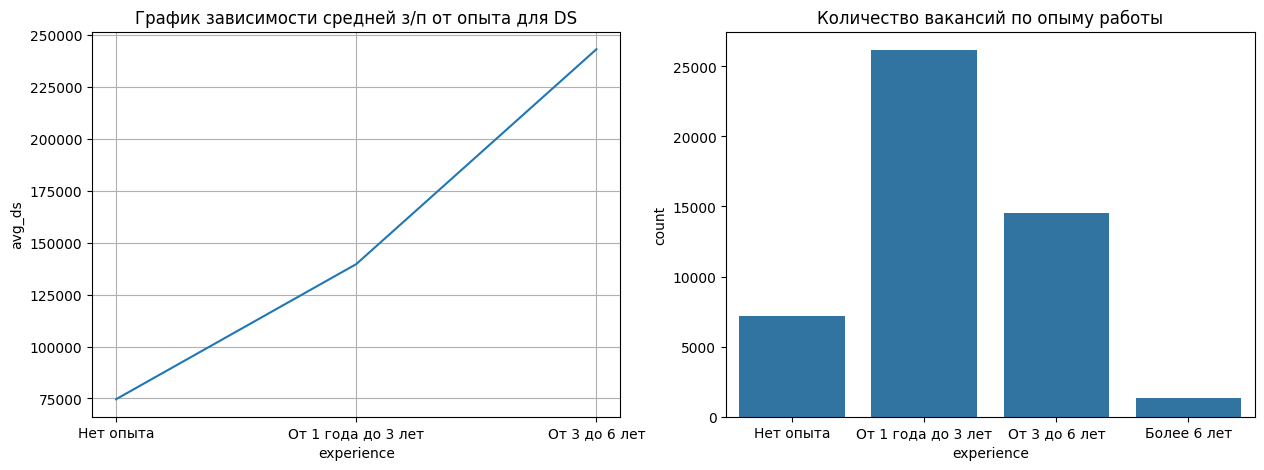

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes= plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(x='experience', y='avg_ds', data=aw_6_6, ax=axes[0])
sns.barplot(x='experience', y='count', data=aw_4_5, order=['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет'], ax=axes[1])
axes[0].set_title('График зависимости средней з/п от опыта для DS')
axes[1].set_title('Количество вакансий по опыму работы')
axes[0].grid(True)

Визуализация показывает, что самые востребованные это специалисты с опытом от 1 до 3х лет, но допольно большое количество востребовано без опыта. Сделаем еще запрос для сравнения показателей для DS и остальных вакансий:

In [52]:
query_7_1 = f'''
SELECT 
   	experience as experience,
   	round(avg(coalesce((salary_from + salary_to) / 2, salary_from, salary_to)), 0) as avg_no_DS
FROM VACANCIES
WHERE 	(name NOT ILIKE '%data scientist%' or 
		name NOT ILIKE '%data science%' or 
		name NOT ILIKE '%исследователь данных%' or 
		(name NOT LIKE '%ML%' and 
		name NOT LIKE '%HTML%') or
		name NOT ILIKE '%machine learning%' or 
		name NOT ILIKE '%машинн%обучен%') and  
        (salary_from is not NULL or salary_to is not NULL)
GROUP BY experience
'''

In [53]:
aw_7_1 = aw_6_6.merge(pd.read_sql_query(query_7_1, connection), how='left')
aw_7_1['delta'] = aw_7_1['avg_ds'] / aw_7_1['avg_no_ds'] *100 - 100
aw_7_1

C:\Users\ego4udo\AppData\Local\Temp\ipykernel_10048\342404409.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  aw_7_1 = aw_6_6.merge(pd.read_sql_query(query_7_1, connection), how='left')


,experience,avg_ds,avg_no_ds,delta
0,Нет опыта,74643.0,40472.0,84.431212
1,От 1 года до 3 лет,139675.0,76541.0,82.483898
2,От 3 до 6 лет,243115.0,133211.0,82.503697


Как видим, более, чем на 80% средние зарплаты для DS выше, чем для остальных групп

Отвечая на вопрос: "что из себя представляют данные и насколько они соответствуют целям проекта"
можно с уверенностью сказать, что они состоят из описательных, количественных и качественных данных, которые возможно использовать в DS модели для целей ML

In [54]:
# не забываем закрыть соединение после окончания работы
connection.close()